In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
Red_1 = "ws_4"
Red_2 = "Captura-Agus-Wireshark"
Red_3 = "lion"
results_dir_fmt = "results/analysis_1/{red}_{file}"

In [4]:
def load_dfs_by_red(red):
    prot_perc = pd.read_csv(results_dir_fmt.format(red=red, file="protocol_percentage.csv"))

    symbol_freq = pd.read_csv(results_dir_fmt.format(red=red, file="symbol_frequency.csv"))

    info = pd.read_csv(results_dir_fmt.format(red=red, file="information.csv"))

    entropy = pd.read_csv(results_dir_fmt.format(red=red, file="entropy.csv"))

    broadunicast = pd.read_csv(results_dir_fmt.format(red=red, file="broadcast_unicast.csv"))
    
    return (prot_perc, symbol_freq, info, entropy, broadunicast)
    

In [5]:
def draw_pie(_df, outputname):
    plt.pie(_df["value"], labels = _df["type"], labeldistance = None, autopct='%1.2f%%', pctdistance=0.7)
    plt.legend()

    plt.savefig('./results/analysis_1/imgs/{}.png'.format(outputname))
    plt.show()


In [6]:
def draw_info_by_proto(_df_info, red, _df_entropy, outputname):
    plt.bar(_df_info["type"], _df_info["value"])
    plt.xlabel("Protocolo")
    plt.ylabel("Information")

    entropy = _df_entropy[_df_entropy["dataset"]==red]["value"].item()
    plt.axhline(y=entropy, color='r', linestyle='-')
    
    entropy_str = "{:.4f}".format(entropy)
    plt.text( x = -1.25, y = 0.5, s = 'Entropia: '+ str(entropy_str))
    plt.savefig('./results/analysis_1/imgs/{}.png'.format(outputname))
    plt.show()


# Read source - Red 1

In [7]:
df_Red_1 = pd.read_csv("Capturas_csv/" + Red_1 +".csv")
df_Red_1_prot_perc, df_Red_1_symbol_freq, df_Red_1_info, df_Red_1_entropy, df_Red_1_broadunicast = load_dfs_by_red(Red_1)
new_row = {'type':'IEEE 802.1X', 'value': 0.0}
df_Red_1_prot_perc = df_Red_1_prot_perc.append(new_row, ignore_index=True)

# Read source - Red 2

In [8]:
df_Red_2 = pd.read_csv("Capturas_csv/" + Red_2 +".csv")
df_Red_2_prot_perc, df_Red_2_symbol_freq, df_Red_2_info, df_Red_2_entropy, df_Red_2_broadunicast = load_dfs_by_red(Red_2)

# Read source - Red 3

In [9]:
df_Red_3 = pd.read_csv("Capturas_csv/" + Red_3 +".csv")
df_Red_3_prot_perc, df_Red_3_symbol_freq, df_Red_3_info, df_Red_3_entropy, df_Red_3_broadunicast = load_dfs_by_red(Red_3)

# Merge entropy - Red 1, Red 2, Red 3

In [10]:
df_entropy = pd.concat([df_Red_1_entropy, df_Red_2_entropy, df_Red_3_entropy])
df_entropy

,dataset,value
0,ws_4,0.049668
0,Captura-Agus-Wireshark,0.349423
0,lion,0.082268


# Frecuencia por protocolo

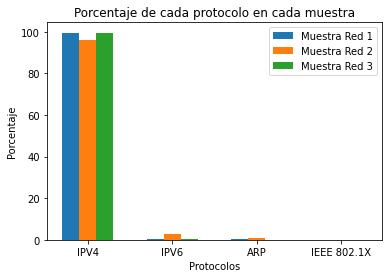

In [11]:
X_axis = np.arange(4)
  
plt.bar(x = X_axis - 0.2, height = df_Red_1_prot_perc['value'], width = 0.2, label = 'Muestra Red 1')
plt.bar(x = X_axis, height = df_Red_2_prot_perc['value'], width = 0.2, label = 'Muestra Red 2')
plt.bar(x = X_axis + 0.2, height = df_Red_3_prot_perc['value'], width = 0.2, label = 'Muestra Red 3')

  
plt.xticks(X_axis, df_Red_1_prot_perc['type'])
plt.xlabel("Protocolos")
plt.ylabel("Porcentaje")
plt.title("Porcentaje de cada protocolo en cada muestra")
plt.legend()
plt.savefig('./results/analysis_1/imgs/freq_protocolos_cada_red_info.png')
plt.show()

# Informacion por protocolo - Red 1

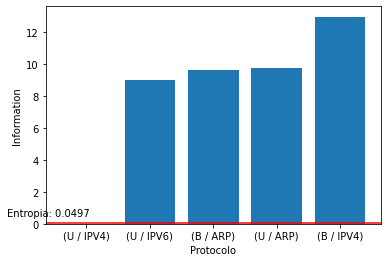

In [12]:
draw_info_by_proto(df_Red_1_info, Red_1, df_Red_1_entropy, "red_1_info")


# Informacion por protocolo - Red 2

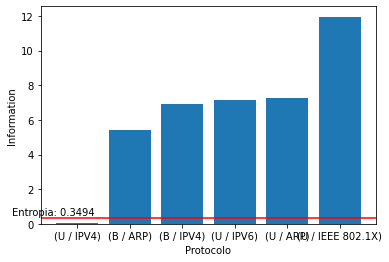

In [13]:
draw_info_by_proto(df_Red_2_info, Red_2, df_Red_2_entropy, "red_2_info")


# Informacion por protocolo - Red 3

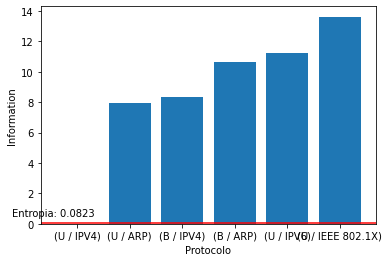

In [14]:
draw_info_by_proto(df_Red_3_info, Red_3, df_Red_3_entropy, "red_3_info")


# Porcentaje tráfico Red 1

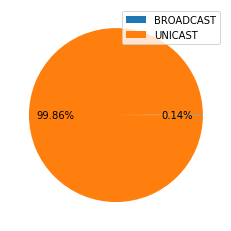

In [15]:
draw_pie(df_Red_1_broadunicast, "red_1_broadcast_unicast")



In [19]:
df_Red_1_broadunicast["p"] =  df_Red_1_broadunicast['value']/df_Red_1_broadunicast['value'].sum()
df_Red_1_broadunicast

,type,value,p
0,BROADCAST,56,0.001417
1,UNICAST,39455,0.998583


# Porcentaje tráfico Red 2

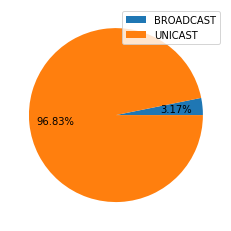

In [159]:
draw_pie(df_Red_2_broadunicast, "red_2_broadcast_unicast")


In [20]:
df_Red_2_broadunicast["p"] =  df_Red_2_broadunicast['value']/df_Red_2_broadunicast['value'].sum()
df_Red_2_broadunicast

,type,value,p
0,BROADCAST,756,0.03171
1,UNICAST,23085,0.96829


# Porcentaje tráfico Red 3

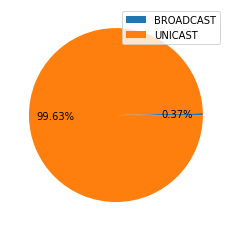

In [160]:
draw_pie(df_Red_3_broadunicast, "red_3_broadcast_unicast")


In [21]:
df_Red_3_broadunicast["p"] =  df_Red_3_broadunicast['value']/df_Red_3_broadunicast['value'].sum()
df_Red_3_broadunicast

,type,value,p
0,BROADCAST,188,0.003708
1,UNICAST,50507,0.996292
